In [ ]:
!pip install OSKut
!pip install sefr_cut

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.1/312.1 kB 32.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.0-cp310-cp310-linux_x86_64.whl size=90337 sha256=a891d62515e2ff72bd43213eead0dded5616254da4edd0457431c67c215d382f
  Stored in directory: /root/.cache/pip/wheels/d9/2c/59/a06c8cb22b93704fbb6c96a4bd68e71b43bb7a4bc2f0410d81
Successfully built pyahocorasick
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 67.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 70.7 MB/s eta 0:00:00


In [ ]:
!pip install pythainlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 43.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
df=pd.read_csv('pizza-UTF8-traindataset-3.csv')
df

,class,text
0,0,วันนี้สั่งมา...\rส่งก็ช้า เปิดมาก็ไม่มีซอส ไม่...
1,0,สปาเกตตี้ขี้เมา เค็มมากกกกกกกกกก\rกินคำเดียวพุ...
2,0,ตอนนี้กินอยู่ที่เซ็นทรัลพระราม2 \rเรื่องอาหาร ...
3,0,วันนี้สั่งมากินที่บ้าน รสชาติของสปาเกตตี้ ซีฟู...
4,0,วันที่29 ณ.สาขาริเวอร์ไซค์ตรงข้ามสน.บุคคโล ผมจ...
...,...,...
73,1,บริการดีมากค่ะ พอดีสั่งแล้วฝนพึ่งตก manager เด...
74,1,ชอบแป้งบางกรอบที่ซูดเลย เครื่องเนื้อแน่น ซอลอร...
75,1,สั่งออนไลน์ ง่ายสะดวก ส่งตรงเวลา พิซซ่าแป้งบาง...
76,1,โคตรอร่อย จัดให้เป็นที่สุดแห่งพิซซ่ายี่ห้อตลาด...


In [ ]:
import re
import string
from pythainlp.corpus.common import thai_stopwords
from pythainlp.tokenize import word_tokenize

thai_stopwords = list(thai_stopwords())
thai_stopwords

def perform_removal(word):
    #กำจัดช่องว่างก่อน/หลังคำ
    word = word.strip()

    #เปลี่ยนภาษาอังกฤษเป็นตัวอักษรตัวเล็ก
    word = word.lower()

    #กำจัดเครื่องหมายวรรคตอน
    word = word.translate(str.maketrans('','', string.punctuation))

    #กำจัด stop words และตัวเลขโดดๆ
    if(word.isdigit() ):
        return ""
    else:
        return word

def clean_text(text):
  text = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', "ๆ", "ฯ","'","#","(",")","-"))
  tokens=word_tokenize(text, engine="oskut", keep_whitespace=False)

  tokens = [word for word in tokens if word.lower not in thai_stopwords]

  tokens = [word for word in tokens if len(word)>1]

  tokens = [perform_removal(word) for word in tokens]


  text = ' '.join(tokens)
  return text

In [ ]:
df['text'] = df['text'].apply(lambda x:clean_text(x))
df

1/1 [==============================] - 0s 35ms/step


,class,text
0,0,วัน นี้ สั่ง มา ส่ง ก็ ช้า เปิด มา ก็ ไม่ มีซอ...
1,0,สปา เกต ตี้ ขี้ เมา เค็ม มากกกกกกกกกก กิน คำ เ...
2,0,ตอน นี้ กิน อยู่ ที่ เซ็นทรัล พระราม เรื่อง อา...
3,0,วัน นี้ สั่ง มา กิน ที่ บ้าน รสชาติ ของ สปา เก...
4,0,วัน ที่29 สา ขา ริเวอร์ไซค์ ตรง ข้าม สน บุคคโล...
...,...,...
73,1,บริการ ดี มาก ค่ะ พอ ดี สั่ง แล้ว ฝน พึ่ง ตก m...
74,1,ชอบ แป้ง บาง กรอบ ที่ ซูด เลย เครื่อง เนื้อ แน...
75,1,สั่ง ออนไลน์ ง่าย สะดวก ส่ง ตรง เวลา พิซซ่า แป...
76,1,โคตร อร่อย จัด ให้ เป็น ที่ สุด แห่ง พิซซ่า ยี...


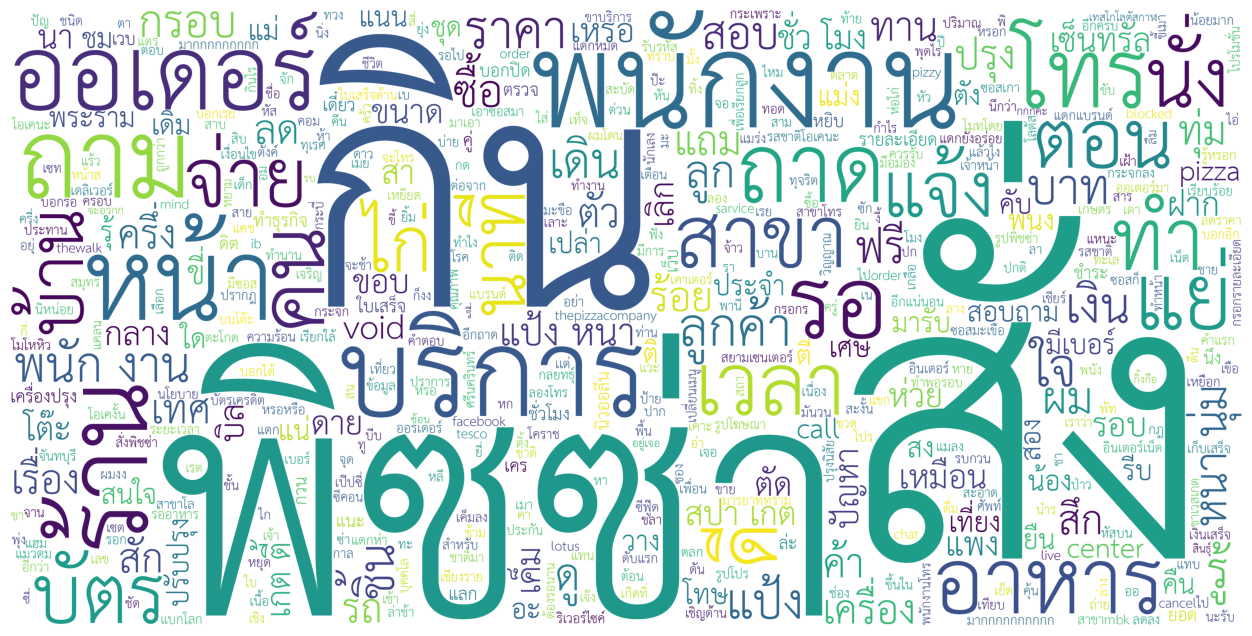

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

df_pos = df[df['class'] == 0]
pos_word_all = " ".join(text for text in df_pos['text'])
reg = r"[ก-๙a-zA-Z']+"
fp = 'THSarabunNew.ttf'
wordcloud = WordCloud(stopwords=thai_stopwords, background_color = 'white', max_words=2000, height = 2000, width=4000, font_path=fp, regexp=reg).generate(pos_word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

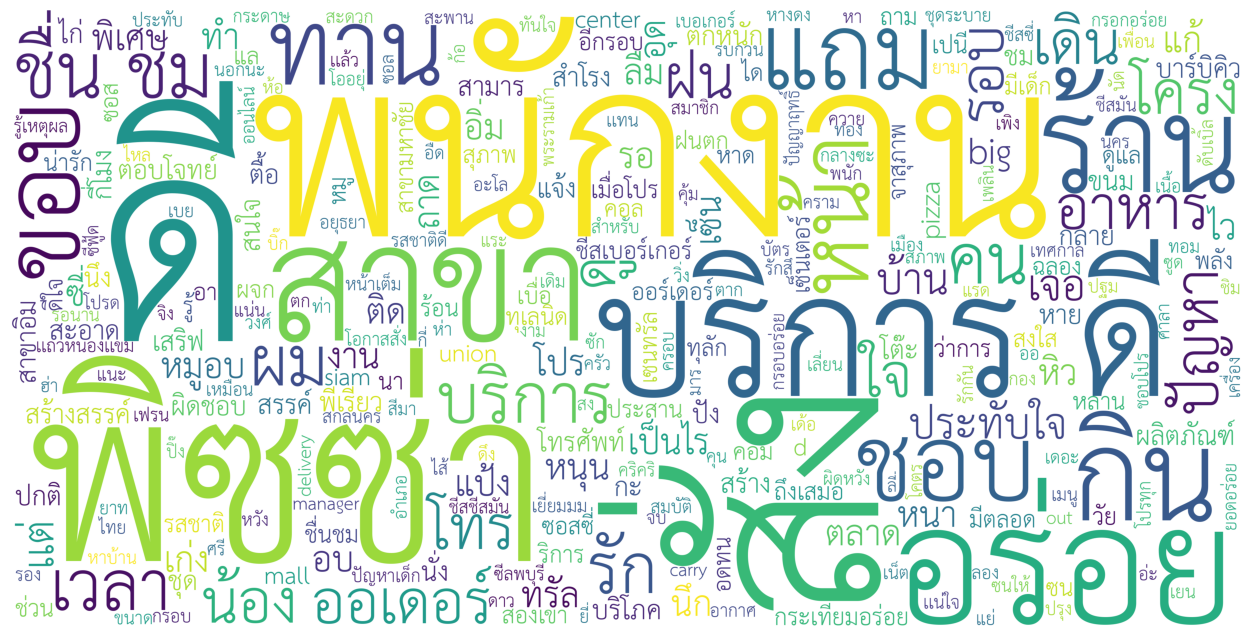

In [ ]:
df_neg = df[df['class'] == 1]
neg_word_all = " ".join(text for text in df_neg['text'])
wordcloud = WordCloud(stopwords=thai_stopwords, background_color = 'white', max_words=2000, height = 2000, width=4000, font_path=fp, regexp=reg).generate(neg_word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.20, stratify=df['class'])

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer


vec = CountVectorizer(
    ngram_range=(1,3)
)

# vec = TfidfVectorizer(
#    ngram_range=(1,3)
# )

vec.fit_transform(df_train['text'])
vec.vocabulary_

NameError: ignored

In [ ]:
import numpy as np

#สุ่มช่วงของ 5 เอกสารที่ติดกันมาทดลองใช้งาน
count_vector= vec.fit_transform(df_train['text'][:10])
count_array = np.array(count_vector.todense())

#แปลงเป็น DataFrame เพื่อง่ายแก่การอ่าน
df_x = pd.DataFrame(count_array,columns=vec.get_feature_names_out())
df_x

,29,29 สา,29 สา ขา,call,call center,call center อง,cancelไป,cancelไป เลย,cancelไป เลย เรา,center,...,ไม ใน าน,ไว,ไว าน,ไว าน กำล,ไว เหรอ,ไว เหรอ หร,ไหน,ไหน แล,ไหน แล บอก,ไหน แล แต
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,1,0,...,0,1,1,1,0,0,2,2,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,1,1,1,0,0,0,1,...,0,1,0,0,1,1,0,0,0,0


In [ ]:
X_train = vec.fit_transform(df_train.text)
X_test = vec.transform(df_test.text)

y_train = df_train['class']
y_test = df_test['class']

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, classification_report

dt=DecisionTreeClassifier()
dt.fit(X_train, y_train)

preds = dt.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.75      0.38      0.50         8
           1       0.58      0.88      0.70         8

    accuracy                           0.62        16
   macro avg       0.67      0.62      0.60        16
weighted avg       0.67      0.62      0.60        16



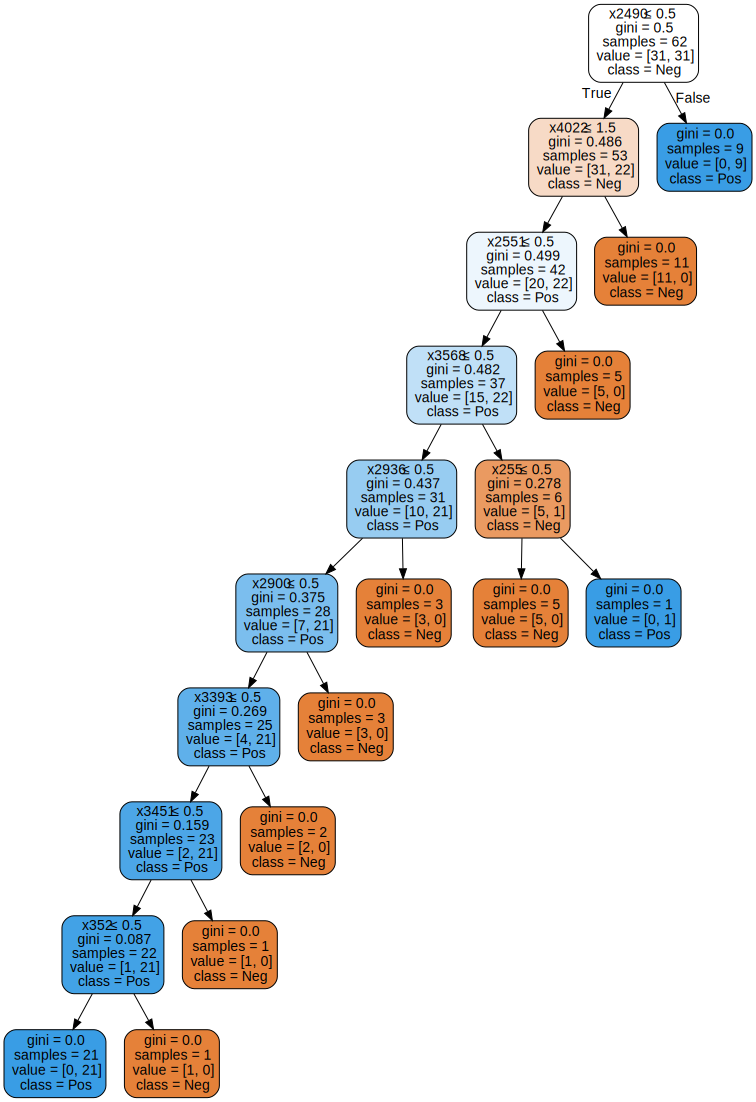

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

# Export decision tree to graphviz format
dot_data = export_graphviz(dt, out_file=None,
                           #feature_names=df.columns,
                           class_names=['Neg','Pos'],
                           filled=True, rounded=True,
                           special_characters=True)

# Visualize decision tree using graphviz
graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.render("pizza_decision_tree")
graph # Display decision tree